# Electromiografía: media cuadrática (RMS).
### Flores Oliva Alejandro Elliot
#### Licenciatura en Física Biomédica en Ciencias Biológicas , Facultad de Ciencias, Universidad Nacional Autónoma de México.

## Índice:

[1. Valores RMS del registro EMG.](#1)

[2. Valores RMS del registro EMG con filtro Wiener.](#2)

[3. Valores RMS del registro EMG con filtro mediano.](#3)

[4. Valores RMS del registro EMG con filtro Butterworth.](#4)

[5. Valores RMS del registro EMG con filtro Savitzky-Golay.](#5)


## Root Mean Square (RMS)

El análisis de Root Mean Square (RMS) es una técnica que proporciona información sobre la amplitud y actividad muscular, por está razón se utiliza para el análisis de señales electromiográficas (EMG). **El análisis RMS calcula la raíz cuadrada de la media de los valores al cuadrado de una señal en un intervalo de tiempo específico**. Algunas de sus de aplicaciones:
 
> Evaluación de la contracción muscular: El RMS permite cuantificar la actividad muscular en términos de la amplitud de las señales EMG. Esto puede utilizarse para determinar la fuerza muscular o la actividad de un músculo específico durante la contracción.

> Caracterización de la fatiga muscular: Se utiliza para evaluar los cambios en la amplitud de la señal EMG durante períodos después del ejercicio o actividad (fatiga muscular). Este análisis brinda información sobre la capacidad del músculo para mantener una contracción prolongada y ayudar en la evaluación del rendimiento muscular.

> Detección de eventos musculares: El análisis de RMS se utiliza para detectar eventos musculares, como la presencia de potenciales de acción o contracciones musculares.

> Comparación de señales EMG: El cálculo del RMS permite comparar la amplitud de diferentes señales EMG y analizar cambios en la actividad muscular en diferentes condiciones o estados (contracción o reposo).

El RMS en el análisis de señales EMG se utiliza para cuantificar la amplitud de los potenciales de acción muscular cuando hay actividad física o cuando no la hay.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wave
from scipy.signal import wiener
from scipy.signal import medfilt
from scipy.signal import butter, filtfilt
from scipy.signal import savgol_filter

In [2]:
# Ruta del archivo .wav
archivo = '../Parkinson Notebooks/1-Registros-EMG/29-01/Registro_AbdCorto_Relajación.wav'

<a id='1'></a>
###  Valores RMS del registro EMG

RMS Canal 1: 65.6784475599105
RMS Canal 2: 57.473632268716365


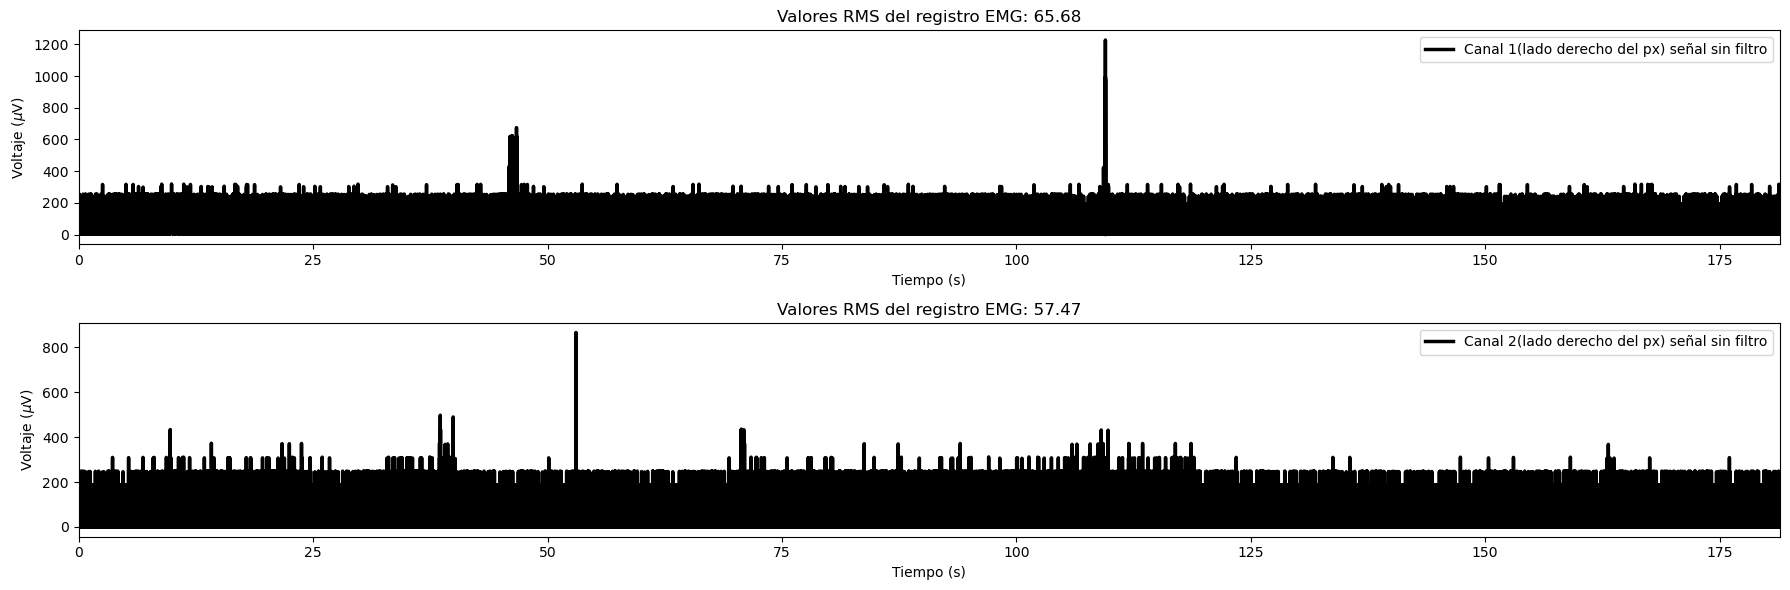

In [3]:
# Leer archivo .wav
with wave.open(archivo , 'rb') as wav:
    # Obtener información del audio
    sample_rate = wav.getframerate()
    n_frames = wav.getnframes()
    n_channels = wav.getnchannels()
    duration = n_frames / sample_rate
    
    # Leer los datos de los canales
    frames = wav.readframes(n_frames)
    audio_data = np.frombuffer(frames, dtype=np.int16)
    
    # Dividir los datos en canales
    audio_data = np.reshape(audio_data, (n_frames, n_channels))
    Canal1 = audio_data[:, 0]
    Canal2 = audio_data[:, 1]

    # Calcular el tiempo en segundos
    tiempo = np.linspace(0, duration, n_frames)
    
    # Calcular el valor RMS de cada canal
    rms_c1 = np.sqrt(np.mean(np.abs(Canal1) ** 2))
    rms_c2 = np.sqrt(np.mean(np.abs(Canal2) ** 2))
    
    # Graficar el valor RMS de cada canal
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 6))
    ax1.plot(tiempo, np.abs(Canal1), linewidth=2.5, color='black', label='Canal 1(lado derecho del px) señal sin filtro')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_xlim(0,max(tiempo))
    ax1.set_ylabel('Voltaje ($\mu$V)')
    ax1.set_title('Valores RMS del registro EMG: {:.2f}'.format(rms_c1))
    ax1.legend()
    
    ax2.plot(tiempo, np.abs(Canal2),linewidth=2.5, color='black', label='Canal 2(lado derecho del px) señal sin filtro')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_xlim(0,max(tiempo))
    ax2.set_ylabel('Voltaje ($\mu$V)')
    ax2.set_title('Valores RMS del registro EMG: {:.2f}'.format(rms_c2))
    ax2.legend()
    
    # Imprimir los valores RMS
    print("RMS Canal 1:", rms_c1)
    print("RMS Canal 2:", rms_c2)
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

####  Valores RMS del registro EMG (Ampliar la ventana de visualización)

RMS Canal 1: 65.6784475599105
RMS Canal 2: 57.473632268716365


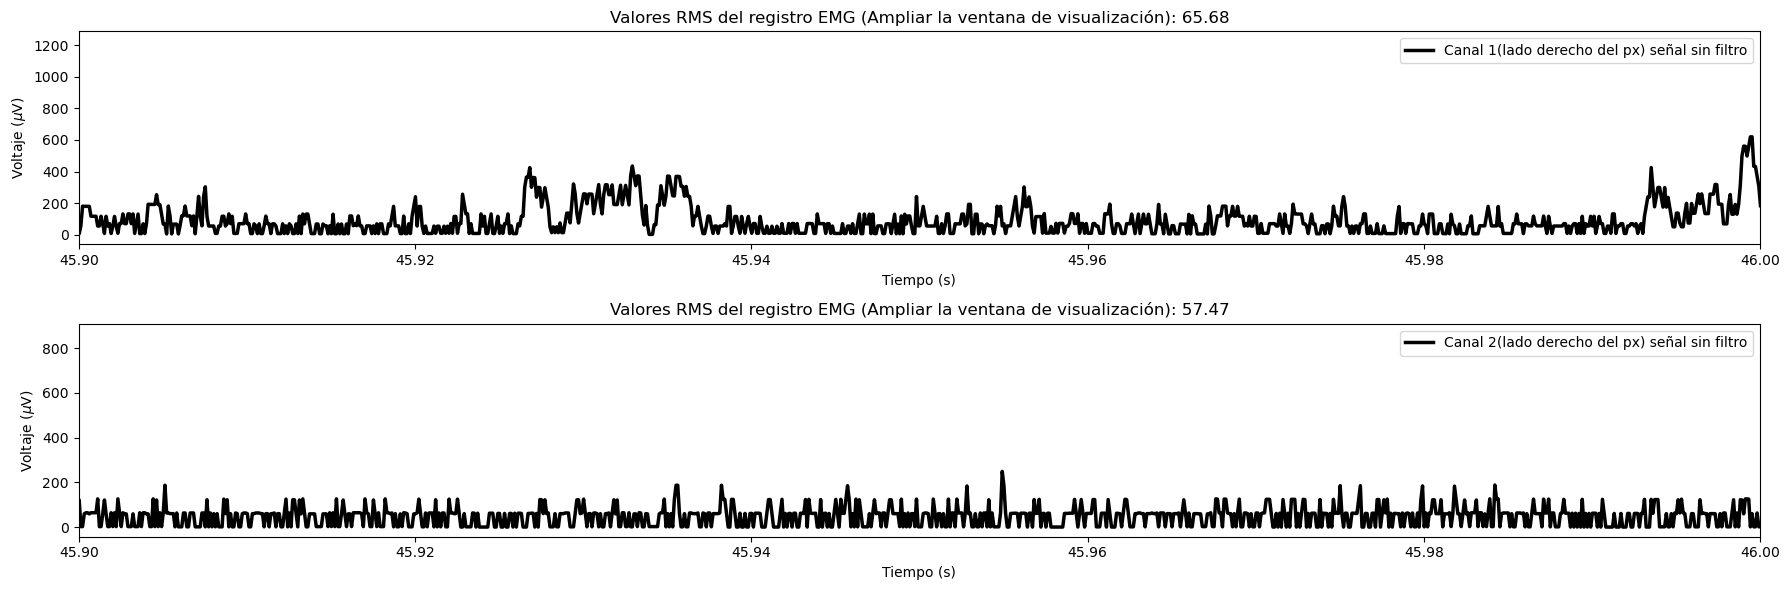

In [4]:
# Leer archivo .wav
with wave.open(archivo , 'rb') as wav:
    # Obtener información del audio
    sample_rate = wav.getframerate()
    n_frames = wav.getnframes()
    n_channels = wav.getnchannels()
    duration = n_frames / sample_rate
    
    # Leer los datos de los canales
    frames = wav.readframes(n_frames)
    audio_data = np.frombuffer(frames, dtype=np.int16)
    
    # Dividir los datos en canales
    audio_data = np.reshape(audio_data, (n_frames, n_channels))
    Canal1 = audio_data[:, 0]
    Canal2 = audio_data[:, 1]

    # Calcular el tiempo en segundos
    tiempo = np.linspace(0, duration, n_frames)
    
    # Calcular el valor RMS de cada canal
    rms_c1 = np.sqrt(np.mean(np.abs(Canal1) ** 2))
    rms_c2 = np.sqrt(np.mean(np.abs(Canal2) ** 2))
    
    # Graficar el valor RMS de cada canal
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 6))
    ax1.plot(tiempo, np.abs(Canal1), linewidth=2.5, color='black', label='Canal 1(lado derecho del px) señal sin filtro')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_xlim(45.9,46.0)
    ax1.set_ylabel('Voltaje ($\mu$V)')
    ax1.set_title('Valores RMS del registro EMG (Ampliar la ventana de visualización): {:.2f}'.format(rms_c1))
    ax1.legend()
    
    ax2.plot(tiempo, np.abs(Canal2),linewidth=2.5, color='black', label='Canal 2(lado derecho del px) señal sin filtro')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_xlim(45.9,46.0)
    ax2.set_ylabel('Voltaje ($\mu$V)')
    ax2.set_title('Valores RMS del registro EMG (Ampliar la ventana de visualización): {:.2f}'.format(rms_c2))
    ax2.legend()
    
    # Imprimir los valores RMS
    print("RMS Canal 1:", rms_c1)
    print("RMS Canal 2:", rms_c2)
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

<a id='2'></a>
###  Valores RMS del registro EMG con filtro Wiener

RMS Canal 1: 33.07953814466708
RMS Canal 2: 28.3144826190763


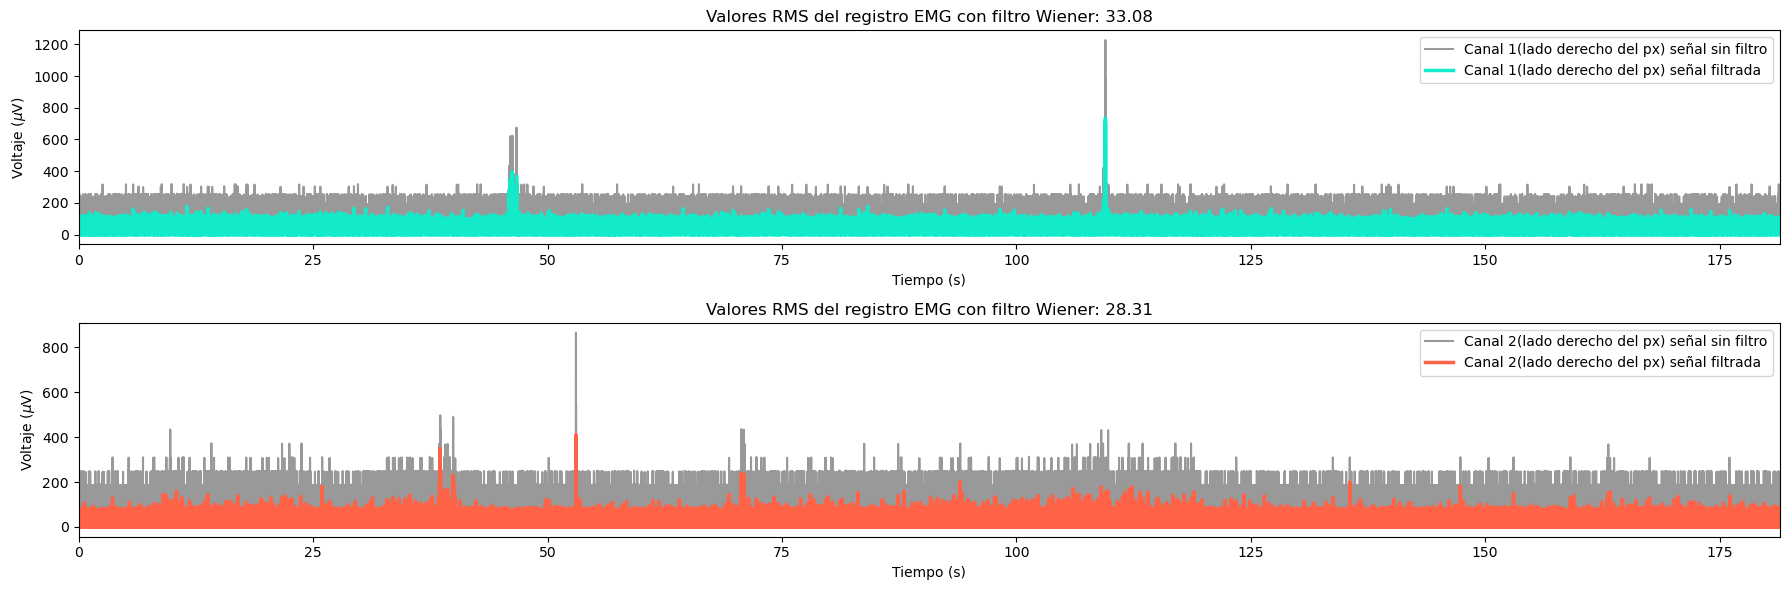

In [5]:
# Leer archivo .wav
with wave.open(archivo , 'rb') as wav:
    # Obtener información del audio
    sample_rate = wav.getframerate()
    n_frames = wav.getnframes()
    n_channels = wav.getnchannels()
    duration = n_frames / sample_rate
    
    # Leer los datos de los canales
    frames = wav.readframes(n_frames)
    audio_data = np.frombuffer(frames, dtype=np.int16)
    
    # Dividir los datos en canales
    audio_data = np.reshape(audio_data, (n_frames, n_channels))
    Canal1 = audio_data[:, 0]
    Canal2 = audio_data[:, 1]
  
    # Aplicar filtro Wiener a cada canal
    ch1_fil = wiener(Canal1, mysize=21)
    ch2_fil= wiener(Canal2, mysize=21)
    
    # Calcular el tiempo en segundos
    tiempo = np.linspace(0, duration, n_frames)
    
    # Calcular el valor RMS de cada canal
    rms_ch1 = np.sqrt(np.mean(np.abs(ch1_fil) ** 2))
    rms_ch2 = np.sqrt(np.mean(np.abs(ch2_fil) ** 2))
    
    # Graficar el valor RMS de cada canal
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 6))
    ax1.plot(tiempo, np.abs(Canal1), color='black',  alpha=0.4, label='Canal 1(lado derecho del px) señal sin filtro')
    ax1.plot(tiempo, np.abs(ch1_fil),linewidth=2.5, color='#13EAC9', label='Canal 1(lado derecho del px) señal filtrada')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_xlim(0,max(tiempo))
    ax1.set_ylabel('Voltaje ($\mu$V)')
    ax1.set_title('Valores RMS del registro EMG con filtro Wiener: {:.2f}'.format(rms_ch1))
    ax1.legend()
    
    ax2.plot(tiempo, np.abs(Canal2), color='black', alpha=0.4, label='Canal 2(lado derecho del px) señal sin filtro')
    ax2.plot(tiempo, np.abs(ch2_fil),linewidth=2.5, color='#FF6347', label='Canal 2(lado derecho del px) señal filtrada')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_xlim(0,max(tiempo))
    ax2.set_ylabel('Voltaje ($\mu$V)')
    ax2.set_title('Valores RMS del registro EMG con filtro Wiener: {:.2f}'.format(rms_ch2))
    ax2.legend()
    
    # Imprimir los valores RMS
    print("RMS Canal 1:", rms_ch1)
    print("RMS Canal 2:", rms_ch2)
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

####  Valores RMS del regsitro EMG (Ampliar la ventana de visualización)

RMS Canal 1: 33.07953814466708
RMS Canal 2: 28.3144826190763


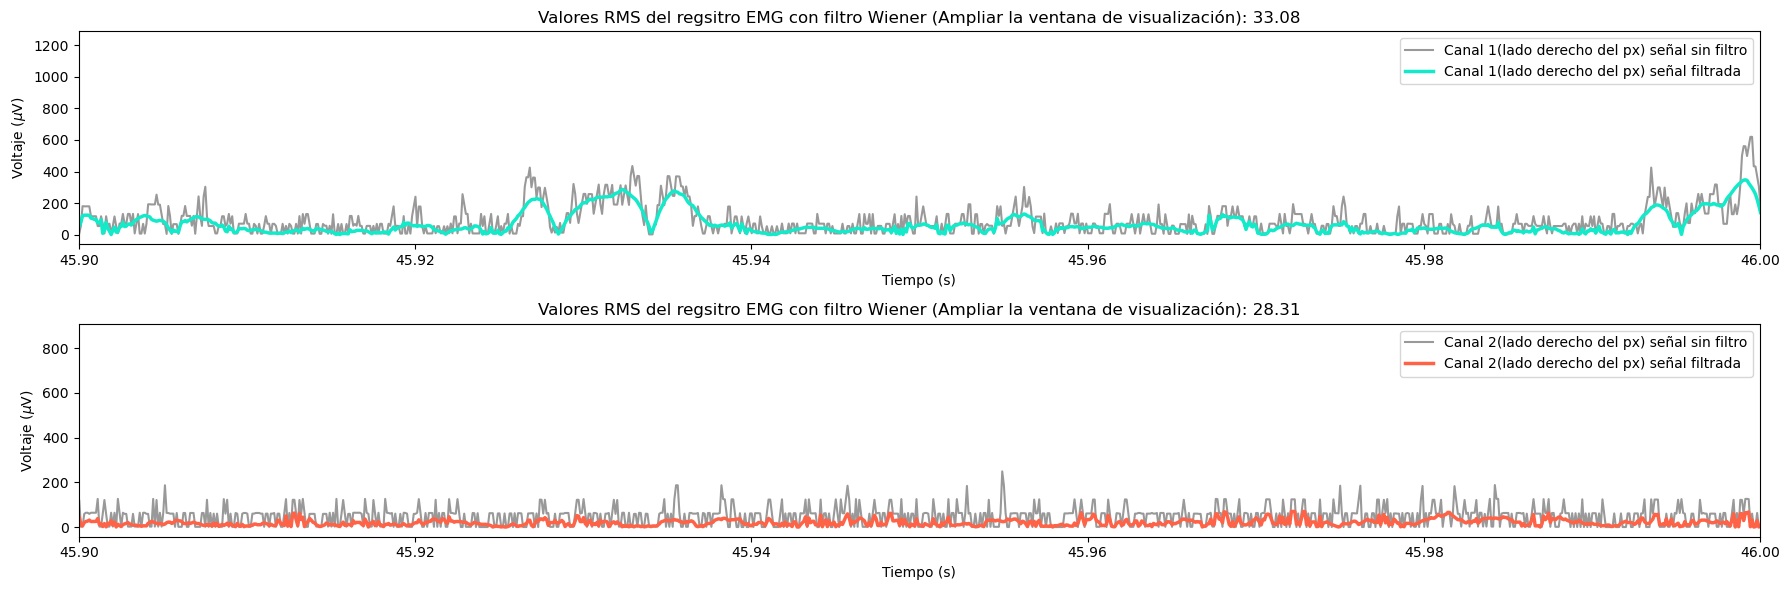

In [6]:
# Leer archivo .wav
with wave.open(archivo , 'rb') as wav:
    # Obtener información del audio
    sample_rate = wav.getframerate()
    n_frames = wav.getnframes()
    n_channels = wav.getnchannels()
    duration = n_frames / sample_rate
    
    # Leer los datos de los canales
    frames = wav.readframes(n_frames)
    audio_data = np.frombuffer(frames, dtype=np.int16)
    
    # Dividir los datos en canales
    audio_data = np.reshape(audio_data, (n_frames, n_channels))
    Canal1 = audio_data[:, 0]
    Canal2 = audio_data[:, 1]
  
    # Aplicar filtro Wiener a cada canal
    ch1_fil = wiener(Canal1, mysize=21)
    ch2_fil = wiener(Canal2, mysize=21)
    
    # Calcular el tiempo en segundos
    tiempo = np.linspace(0, duration, n_frames)
    
    # Calcular el valor RMS de cada canal
    rms_ch1 = np.sqrt(np.mean(np.abs(ch1_fil) ** 2))
    rms_ch2 = np.sqrt(np.mean(np.abs(ch2_fil) ** 2))
    
    # Graficar el valor RMS de cada canal
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 6))
    ax1.plot(tiempo, np.abs(Canal1), color='black', alpha=0.4, label='Canal 1(lado derecho del px) señal sin filtro')
    ax1.plot(tiempo, np.abs(ch1_fil),linewidth=2.5, color='#13EAC9', label='Canal 1(lado derecho del px) señal filtrada')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_xlim(45.9,46.0)
    ax1.set_ylabel('Voltaje ($\mu$V)')
    ax1.set_title('Valores RMS del regsitro EMG con filtro Wiener (Ampliar la ventana de visualización): {:.2f}'.format(rms_ch1))
    ax1.legend()
    
    ax2.plot(tiempo, np.abs(Canal2), color='black',  alpha=0.4,label='Canal 2(lado derecho del px) señal sin filtro')
    ax2.plot(tiempo, np.abs(ch2_fil),linewidth=2.5, color='#FF6347', label='Canal 2(lado derecho del px) señal filtrada')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_xlim(45.9,46.0)
    ax2.set_ylabel('Voltaje ($\mu$V)')
    ax2.set_title('Valores RMS del regsitro EMG con filtro Wiener (Ampliar la ventana de visualización): {:.2f}'.format(rms_ch2))
    ax2.legend()
    
    # Imprimir los valores RMS
    print("RMS Canal 1:", rms_ch1)
    print("RMS Canal 2:", rms_ch2)
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

<a id='3'></a>
###  Valores RMS del registro EMG con filtro mediano

RMS Canal 1: 49.67237048029285
RMS Canal 2: 45.48287282134792


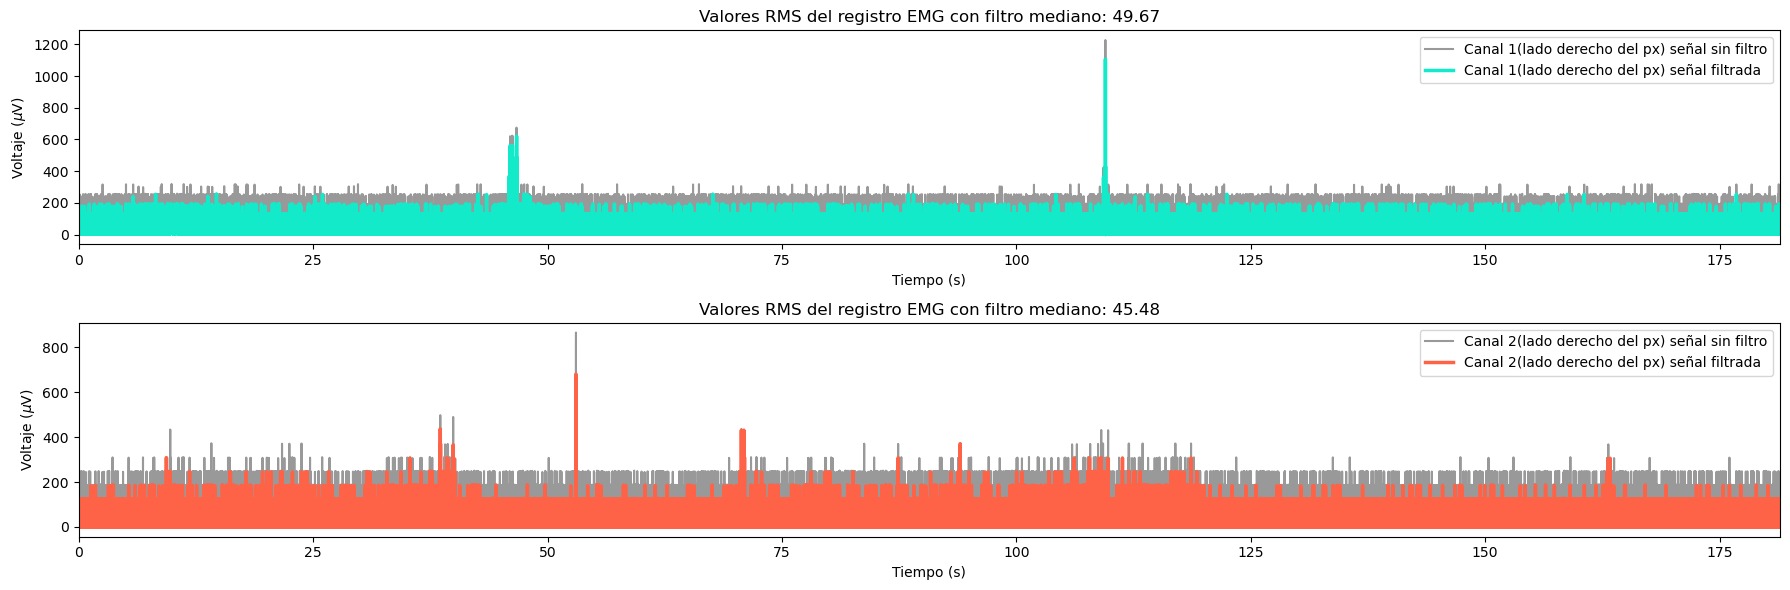

In [7]:
# Leer archivo .wav
with wave.open(archivo , 'rb') as wav:
    # Obtener información del audio
    sample_rate = wav.getframerate()
    n_frames = wav.getnframes()
    n_channels = wav.getnchannels()
    duration = n_frames / sample_rate
    
    # Leer los datos de los canales
    frames = wav.readframes(n_frames)
    audio_data = np.frombuffer(frames, dtype=np.int16)
    
    # Dividir los datos en canales
    audio_data = np.reshape(audio_data, (n_frames, n_channels))
    Canal1 = audio_data[:, 0]
    Canal2 = audio_data[:, 1]
    
    # Aplicar filtro mediano a cada canal
    cha1_fil = medfilt(Canal1, kernel_size=5)
    cha2_fil = medfilt(Canal2, kernel_size=5)
    
    # Calcular el tiempo en segundos
    tiempo = np.linspace(0, duration, n_frames)
    
    # Calcular el valor RMS de cada canal
    rms_cha1 = np.sqrt(np.mean(np.abs(cha1_fil) ** 2))
    rms_cha2 = np.sqrt(np.mean(np.abs(cha2_fil) ** 2))
    
    # Graficar el valor RMS de cada canal
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 6))
    ax1.plot(tiempo, np.abs(Canal1), color='black',  alpha=0.4, label='Canal 1(lado derecho del px) señal sin filtro')
    ax1.plot(tiempo, np.abs(cha1_fil),linewidth=2.5, color='#13EAC9', label='Canal 1(lado derecho del px) señal filtrada')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_xlim(0,max(tiempo))
    ax1.set_ylabel('Voltaje ($\mu$V)')
    ax1.set_title('Valores RMS del registro EMG con filtro mediano: {:.2f}'.format(rms_cha1))
    ax1.legend()
    
    ax2.plot(tiempo, np.abs(Canal2), color='black',  alpha=0.4, label='Canal 2(lado derecho del px) señal sin filtro')
    ax2.plot(tiempo, np.abs(cha2_fil),linewidth=2.5, color='#FF6347', label='Canal 2(lado derecho del px) señal filtrada')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_xlim(0,max(tiempo))
    ax2.set_ylabel('Voltaje ($\mu$V)')
    ax2.set_title('Valores RMS del registro EMG con filtro mediano: {:.2f}'.format(rms_cha2))
    ax2.legend()
    
    # Imprimir los valores RMS
    print("RMS Canal 1:", rms_cha1)
    print("RMS Canal 2:", rms_cha2)
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

####  Valores RMS del registro EMG (Ampliar la ventana de visualización)

RMS Canal 1: 49.67237048029285
RMS Canal 2: 45.48287282134792


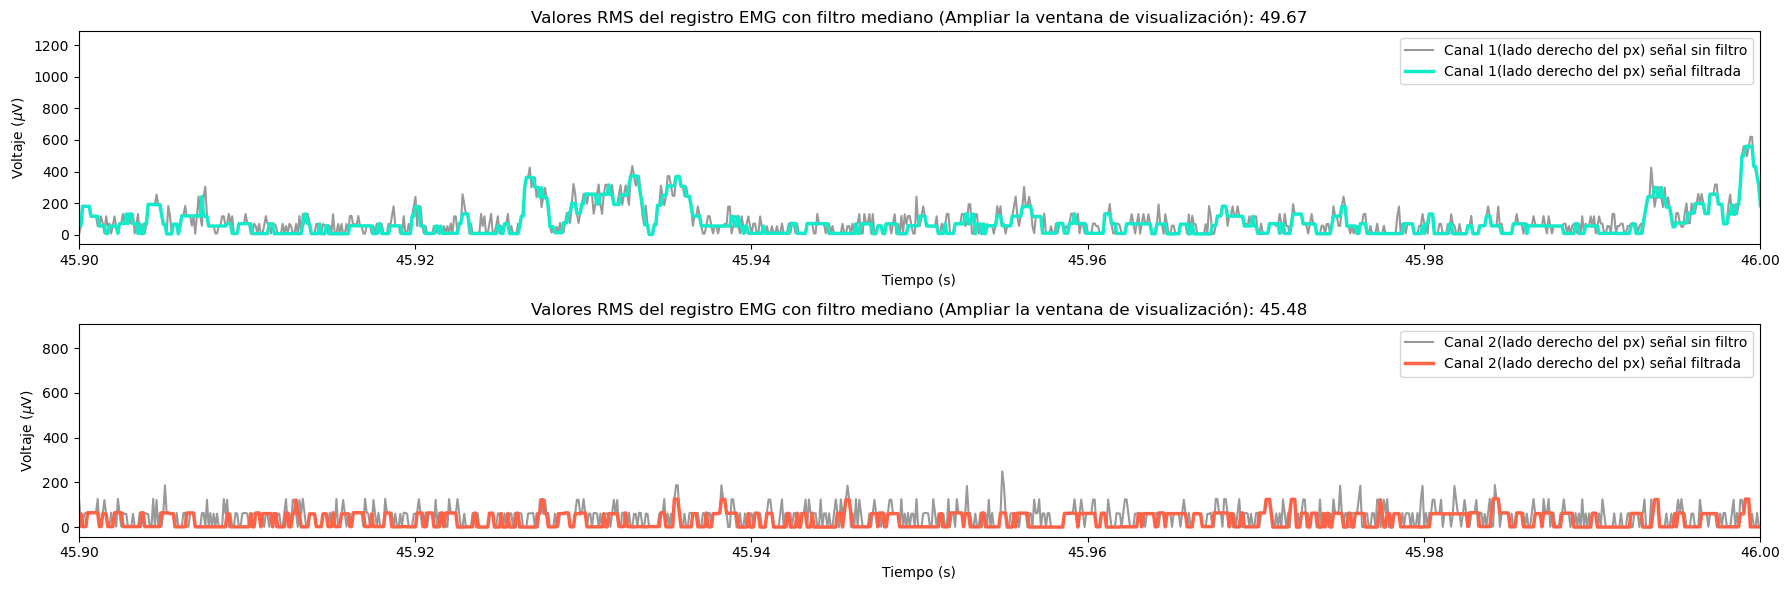

In [8]:
# Leer archivo .wav
with wave.open(archivo , 'rb') as wav:
    # Obtener información del audio
    sample_rate = wav.getframerate()
    n_frames = wav.getnframes()
    n_channels = wav.getnchannels()
    duration = n_frames / sample_rate
    
    # Leer los datos de los canales
    frames = wav.readframes(n_frames)
    audio_data = np.frombuffer(frames, dtype=np.int16)
    
    # Dividir los datos en canales
    audio_data = np.reshape(audio_data, (n_frames, n_channels))
    Canal1 = audio_data[:, 0]
    Canal2 = audio_data[:, 1]
    
    # Aplicar filtro mediano a cada canal
    cha1_fil = medfilt(Canal1, kernel_size=5)
    cha2_fil = medfilt(Canal2, kernel_size=5)
    
    # Calcular el tiempo en segundos
    tiempo= np.linspace(0, duration, n_frames)
    
    # Calcular el valor RMS de cada canal
    rms_cha1 = np.sqrt(np.mean(np.abs(cha1_fil) ** 2))
    rms_cha2 = np.sqrt(np.mean(np.abs(cha2_fil) ** 2))
    
    # Graficar el valor RMS de cada canal
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 6))
    ax1.plot(tiempo, np.abs(Canal1), color='black',  alpha=0.4, label='Canal 1(lado derecho del px) señal sin filtro')
    ax1.plot(tiempo, np.abs(cha1_fil),linewidth=2.5, color='#13EAC9', label='Canal 1(lado derecho del px) señal filtrada')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_xlim(45.9,46.0)
    ax1.set_ylabel('Voltaje ($\mu$V)')
    ax1.set_title('Valores RMS del registro EMG con filtro mediano (Ampliar la ventana de visualización): {:.2f}'.format(rms_cha1))
    ax1.legend()
    
    ax2.plot(tiempo, np.abs(Canal2), color='black',  alpha=0.4, label='Canal 2(lado derecho del px) señal sin filtro')
    ax2.plot(tiempo, np.abs(cha2_fil),linewidth=2.5, color='#FF6347', label='Canal 2(lado derecho del px) señal filtrada')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_xlim(45.9,46.0)
    ax2.set_ylabel('Voltaje ($\mu$V)')
    ax2.set_title('Valores RMS del registro EMG con filtro mediano (Ampliar la ventana de visualización): {:.2f}'.format(rms_cha2))
    ax2.legend()
    
    # Imprimir los valores RMS
    print("RMS Canal 1:", rms_cha1)
    print("RMS Canal 2:", rms_cha2)
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

<a id='4'></a>
###  Valores RMS del registro EMG con filtro Butterworth

RMS Canal 1: 33.416802644114675
RMS Canal 2: 28.7113658542274


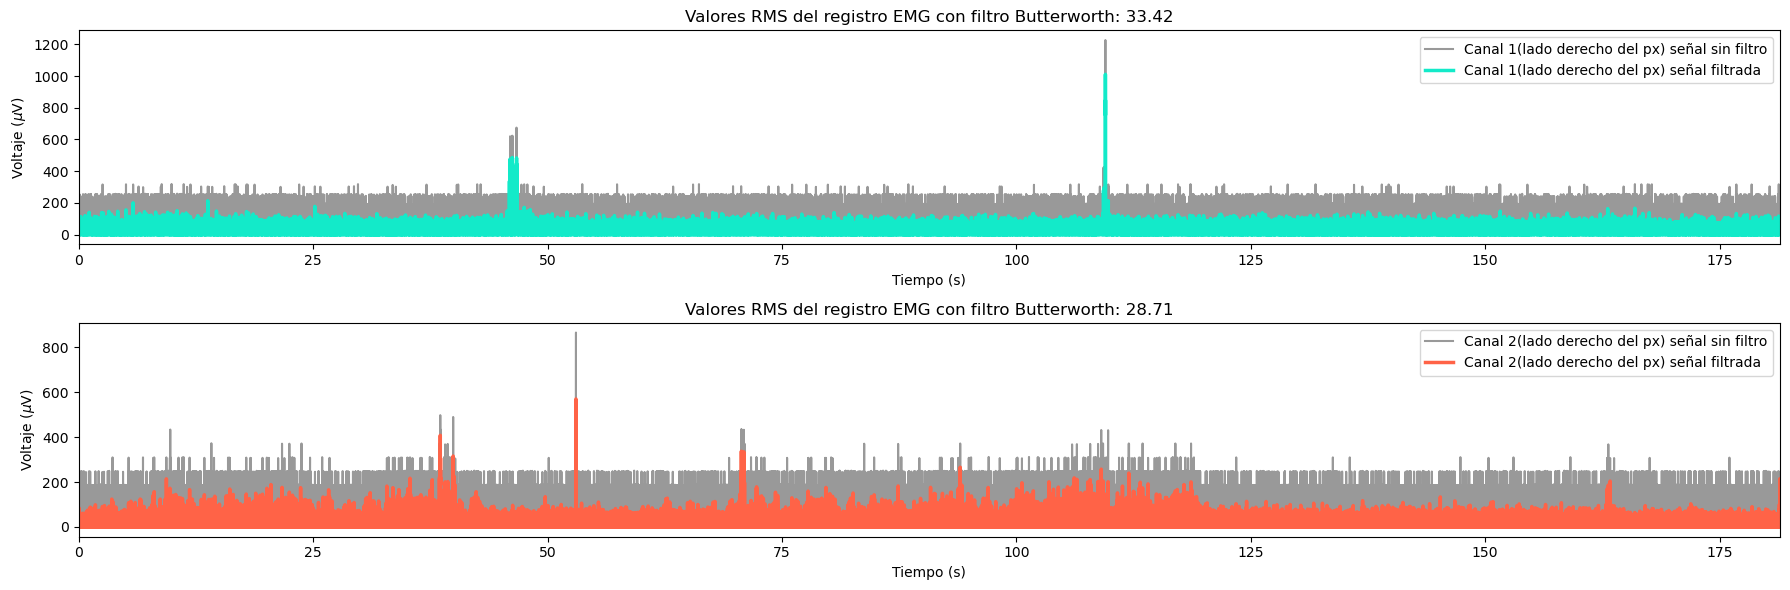

In [9]:
# Filtro Butterworth
lowcut = 10  # Frecuencia de corte inferior (Hz)
highcut = 400  # Frecuencia de corte superior (Hz)
order = 4  # Orden del filtro

# Función para diseñar el filtro
def butter_bandpass(lowcut, highcut, fs, order):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Leer archivo .wav
with wave.open(archivo , 'rb') as wav:
    # Obtener información del audio
    sample_rate = wav.getframerate()
    n_frames = wav.getnframes()
    n_channels = wav.getnchannels()
    duration = n_frames / sample_rate
    
    # Leer los datos de los canales
    frames = wav.readframes(n_frames)
    audio_data = np.frombuffer(frames, dtype=np.int16)
    
    # Dividir los datos en canales
    audio_data = np.reshape(audio_data, (n_frames, n_channels))
    Canal1 = audio_data[:, 0]
    Canal2 = audio_data[:, 1]
    
    # Diseñar los coeficientes del filtro Butterworth
    b, a = butter_bandpass(lowcut, highcut, sample_rate, order)
    
    # Aplicar el filtro Butterworth a cada canal
    cha1_filt = filtfilt(b, a, Canal1)
    cha2_filt = filtfilt(b, a, Canal2)
    
    # Calcular el tiempo en segundos
    tiempo = np.linspace(0, duration, n_frames)
    
    # Calcular el valor RMS de cada canal
    rms_chann1 = np.sqrt(np.mean(np.abs(cha1_filt) ** 2))
    rms_chann2 = np.sqrt(np.mean(np.abs(cha2_filt) ** 2))
    
    # Graficar el valor RMS de cada canal
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 6))
    ax1.plot(tiempo, np.abs(Canal1), color='black', alpha=0.4, label='Canal 1(lado derecho del px) señal sin filtro')
    ax1.plot(tiempo, np.abs(cha1_filt), linewidth=2.5,color='#13EAC9', label='Canal 1(lado derecho del px) señal filtrada')
    ax1.set_ylabel('Voltaje ($\mu$V)')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_xlim(0,max(tiempo))
    ax1.set_title('Valores RMS del registro EMG con filtro Butterworth: {:.2f}'.format(rms_chann1))
    ax1.legend()
    
    ax2.plot(tiempo, np.abs(Canal2), color='black', alpha=0.4, label='Canal 2(lado derecho del px) señal sin filtro')   
    ax2.plot(tiempo, np.abs(cha2_filt), linewidth=2.5, color='#FF6347', label='Canal 2(lado derecho del px) señal filtrada')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_xlim(0,max(tiempo))
    ax2.set_ylabel('Voltaje ($\mu$V)')
    ax2.set_title('Valores RMS del registro EMG con filtro Butterworth: {:.2f}'.format(rms_chann2))
    ax2.legend()
    
    # Imprimir los valores RMS
    print("RMS Canal 1:", rms_chann1)
    print("RMS Canal 2:", rms_chann2)
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

####  Valores RMS del registro EMG (Ampliar la ventana de visualización)

RMS Canal 1: 33.416802644114675
RMS Canal 2: 28.7113658542274


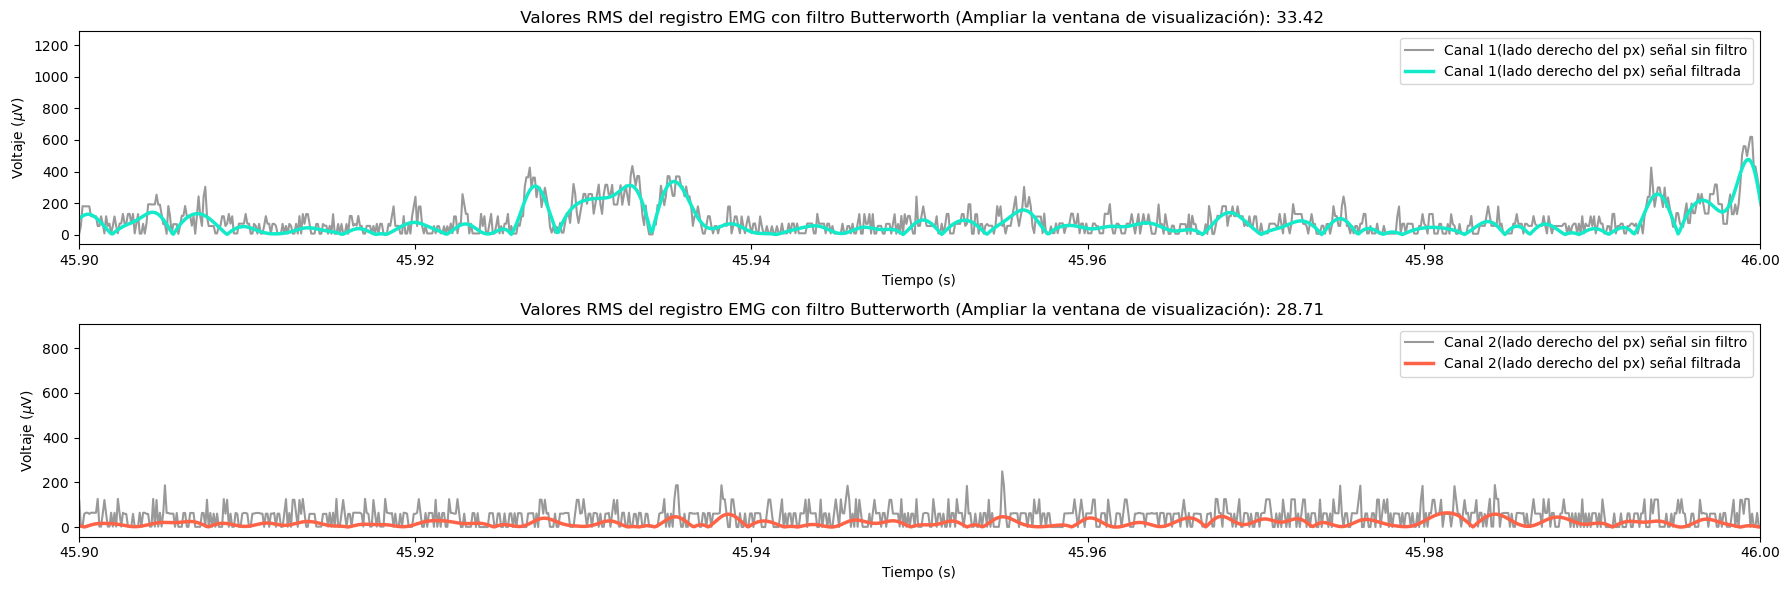

In [10]:
# Filtro Butterworth
lowcut = 10  # Frecuencia de corte inferior (Hz)
highcut = 400  # Frecuencia de corte superior (Hz)
order = 4  # Orden del filtro

# Función para diseñar el filtro
def butter_bandpass(lowcut, highcut, fs, order):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Leer archivo .wav
with wave.open(archivo , 'rb') as wav:
    # Obtener información del audio
    sample_rate = wav.getframerate()
    n_frames = wav.getnframes()
    n_channels = wav.getnchannels()
    duration = n_frames / sample_rate
    
    # Leer los datos de los canales
    frames = wav.readframes(n_frames)
    audio_data = np.frombuffer(frames, dtype=np.int16)
    
    # Dividir los datos en canales
    audio_data = np.reshape(audio_data, (n_frames, n_channels))
    Canal1 = audio_data[:, 0]
    Canal2 = audio_data[:, 1]
    
    # Diseñar los coeficientes del filtro Butterworth
    b, a = butter_bandpass(lowcut, highcut, sample_rate, order)
    
    # Aplicar el filtro Butterworth a cada canal
    cha1_filt = filtfilt(b, a, Canal1)
    cha2_filt = filtfilt(b, a, Canal2)
    
    # Calcular el tiempo en segundos
    tiempo = np.linspace(0, duration, n_frames)
    
    # Calcular el valor RMS de cada canal
    rms_chann1 = np.sqrt(np.mean(np.abs(cha1_filt) ** 2))
    rms_chann2 = np.sqrt(np.mean(np.abs(cha2_filt) ** 2))
    
    # Graficar el valor RMS de cada canal
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 6))
    ax1.plot(tiempo, np.abs(Canal1), color='black', alpha=0.4, label='Canal 1(lado derecho del px) señal sin filtro')
    ax1.plot(tiempo, np.abs(cha1_filt), linewidth=2.5,color='#13EAC9', label='Canal 1(lado derecho del px) señal filtrada')
    ax1.set_ylabel('Voltaje ($\mu$V)')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_xlim(45.9,46.0)
    ax1.set_title(' Valores RMS del registro EMG con filtro Butterworth (Ampliar la ventana de visualización): {:.2f}'.format(rms_chann1))
    ax1.legend()
    
    ax2.plot(tiempo, np.abs(Canal2), color='black', alpha=0.4, label='Canal 2(lado derecho del px) señal sin filtro')   
    ax2.plot(tiempo, np.abs(cha2_filt), linewidth=2.5, color='#FF6347', label='Canal 2(lado derecho del px) señal filtrada')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_xlim(45.9,46.0)
    ax2.set_ylabel('Voltaje ($\mu$V)')
    ax2.set_title(' Valores RMS del registro EMG con filtro Butterworth (Ampliar la ventana de visualización): {:.2f}'.format(rms_chann2))
    ax2.legend()
    
    # Imprimir los valores RMS
    print("RMS Canal 1:", rms_chann1)
    print("RMS Canal 2:", rms_chann2)
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

<a id='5'></a>
###  Valores RMS del registro EMG con filtro Savitzky-Golay

RMS Canal 1: 61.065773031519996
RMS Canal 2: 57.75156421927901


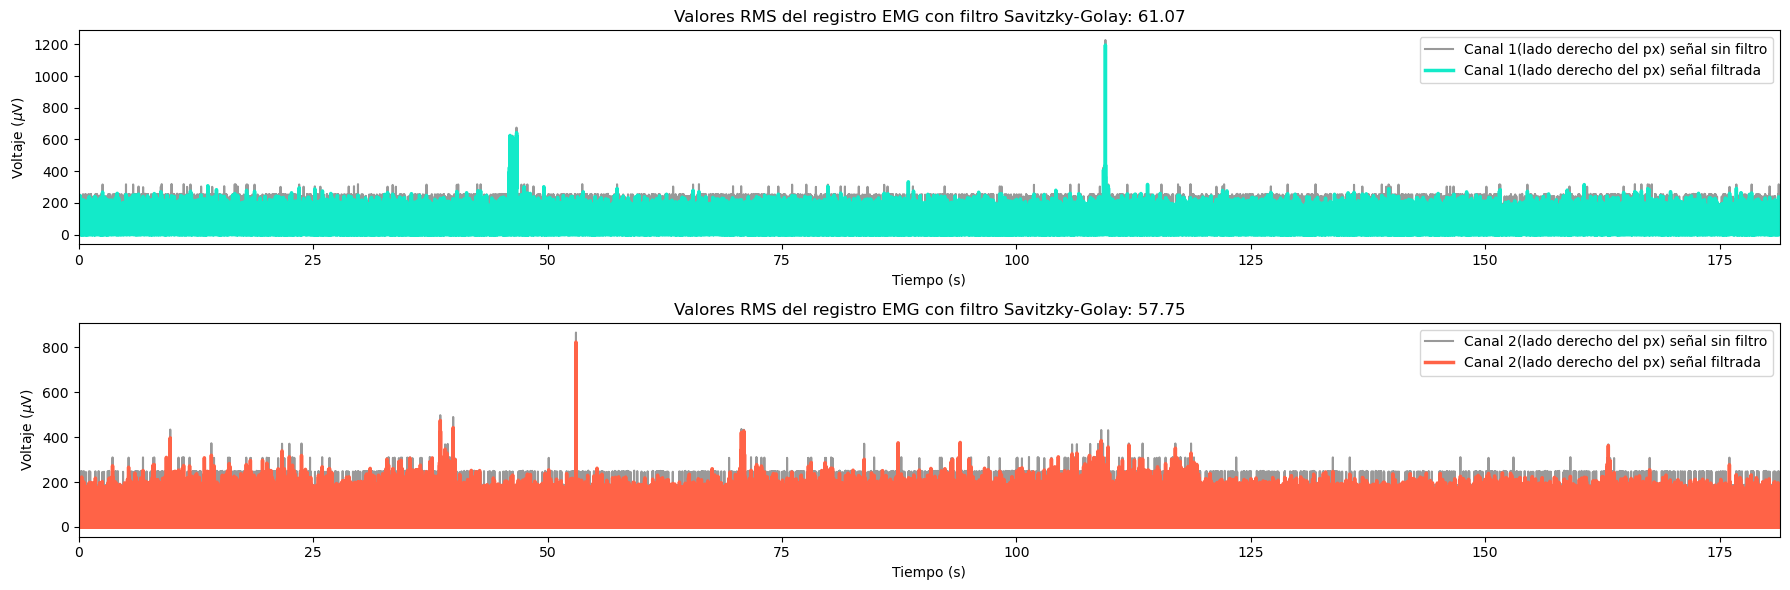

In [11]:
# Parámetros del filtro Savitzky-Golay
window_length = 5  # Longitud de la ventana
poly_order = 2  # Orden del polinomio

# Leer archivo .wav
with wave.open(archivo , 'rb') as wav:
    # Obtener información del audio
    sample_rate = wav.getframerate()
    n_frames = wav.getnframes()
    n_channels = wav.getnchannels()
    duration = n_frames / sample_rate
    
    # Leer los datos de los canales
    frames = wav.readframes(n_frames)
    audio_data = np.frombuffer(frames, dtype=np.int16)
    
    # Dividir los datos en canales
    audio_data = np.reshape(audio_data, (n_frames, n_channels))
    Canal1 = audio_data[:, 0]
    Canal2 = audio_data[:, 1]
    
    # Aplicar el filtro Savitzky-Golay a cada canal
    ch1_filt = savgol_filter(Canal1, window_length, poly_order)
    ch2_filt = savgol_filter(Canal2, window_length, poly_order)
    
    # Calcular el tiempo en segundos
    tiempo = np.linspace(0, duration, n_frames)
    
    # Calcular el valor RMS de cada canal
    rms_channel1 = np.sqrt(np.mean(np.abs(ch1_filt) ** 2))
    rms_channel2 = np.sqrt(np.mean(np.abs(ch2_filt) ** 2))
    
    # Graficar el valor RMS de cada canal
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 6))
    ax1.plot(tiempo, np.abs(Canal1), color='black',  alpha=0.4, label='Canal 1(lado derecho del px) señal sin filtro')
    ax1.plot(tiempo, np.abs(ch1_filt), linewidth=2.5, color='#13EAC9', label='Canal 1(lado derecho del px) señal filtrada')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_xlim(0,max(tiempo))
    ax1.set_ylabel('Voltaje ($\mu$V)')
    ax1.set_title('Valores RMS del registro EMG con filtro Savitzky-Golay: {:.2f}'.format(rms_channel1))
    ax1.legend()
    
    ax2.plot(tiempo, np.abs(Canal2), color='black',  alpha=0.4, label='Canal 2(lado derecho del px) señal sin filtro') 
    ax2.plot(tiempo, np.abs(ch2_filt), linewidth=2.5, color='#FF6347', label='Canal 2(lado derecho del px) señal filtrada')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_xlim(0,max(tiempo))
    ax2.set_ylabel('Voltaje ($\mu$V)')
    ax2.set_title('Valores RMS del registro EMG con filtro Savitzky-Golay: {:.2f}'.format(rms_channel2))
    ax2.legend()
    
    # Imprimir los valores RMS
    print("RMS Canal 1:", rms_channel1)
    print("RMS Canal 2:", rms_channel2)
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

####  Valores RMS del registro EMG (Ampliar la ventana de visualización)

RMS Canal 1: 61.065773031519996
RMS Canal 2: 57.75156421927901


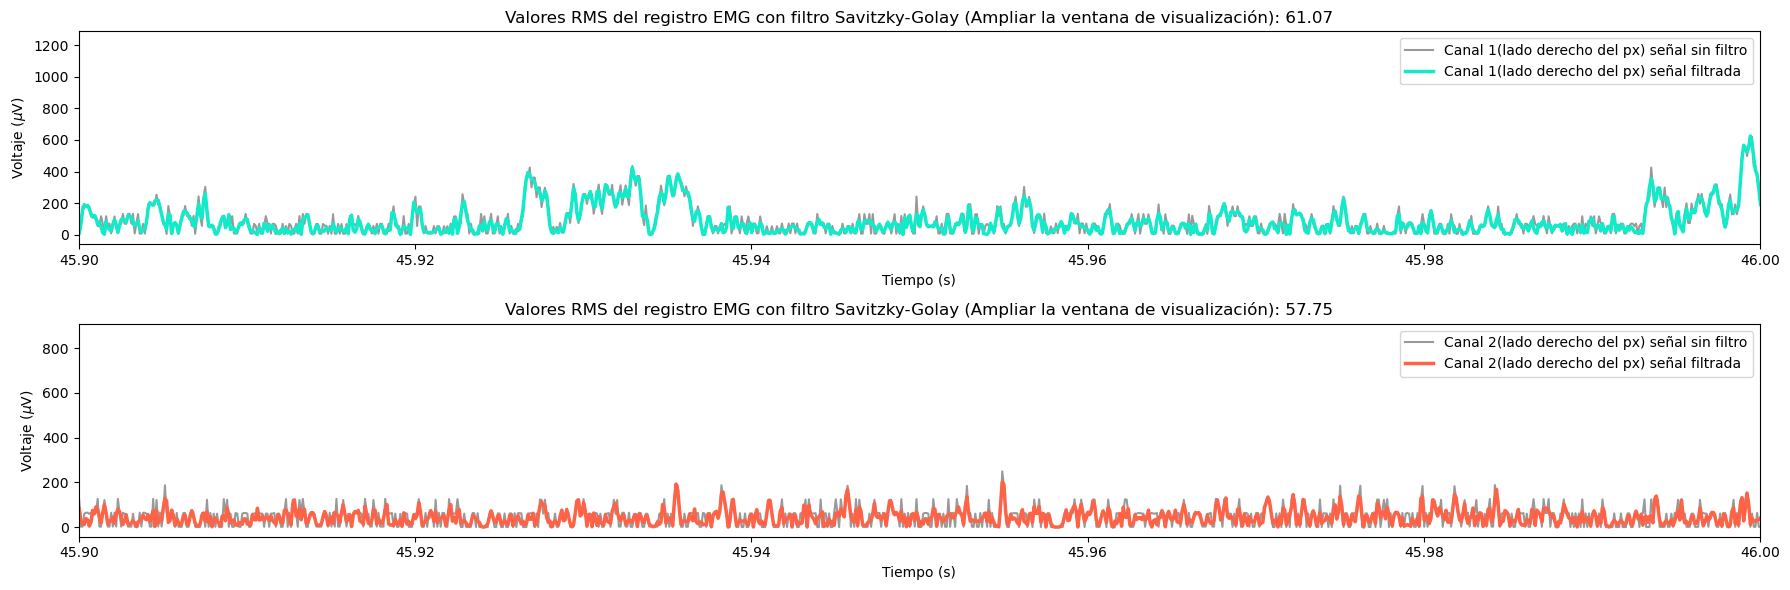

In [12]:
# Parámetros del filtro Savitzky-Golay
window_length = 5  # Longitud de la ventana
poly_order = 2  # Orden del polinomio

# Leer archivo .wav
with wave.open(archivo , 'rb') as wav:
    # Obtener información del audio
    sample_rate = wav.getframerate()
    n_frames = wav.getnframes()
    n_channels = wav.getnchannels()
    duration = n_frames / sample_rate
    
    # Leer los datos de los canales
    frames = wav.readframes(n_frames)
    audio_data = np.frombuffer(frames, dtype=np.int16)
    
    # Dividir los datos en canales
    audio_data = np.reshape(audio_data, (n_frames, n_channels))
    Canal1 = audio_data[:, 0]
    Canal2 = audio_data[:, 1]
    
    # Aplicar el filtro Savitzky-Golay a cada canal
    ch1_filt = savgol_filter(Canal1, window_length, poly_order)
    ch2_filt = savgol_filter(Canal2, window_length, poly_order)
    
    # Calcular el tiempo en segundos
    tiempo = np.linspace(0, duration, n_frames)
    
    # Calcular el valor RMS de cada canal
    rms_channel1 = np.sqrt(np.mean(np.abs(ch1_filt) ** 2))
    rms_channel2 = np.sqrt(np.mean(np.abs(ch2_filt) ** 2))
    
    # Graficar el valor RMS de cada canal
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 6))
    ax1.plot(tiempo, np.abs(Canal1), color='black',  alpha=0.4, label='Canal 1(lado derecho del px) señal sin filtro')
    ax1.plot(tiempo, np.abs(ch1_filt), linewidth=2.5, color='#13EAC9', label='Canal 1(lado derecho del px) señal filtrada')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_xlim(45.9,46.0)
    ax1.set_ylabel('Voltaje ($\mu$V)')
    ax1.set_title('Valores RMS del registro EMG con filtro Savitzky-Golay (Ampliar la ventana de visualización): {:.2f}'.format(rms_channel1))
    ax1.legend()
    
    ax2.plot(tiempo, np.abs(Canal2), color='black',  alpha=0.4, label='Canal 2(lado derecho del px) señal sin filtro') 
    ax2.plot(tiempo, np.abs(ch2_filt), linewidth=2.5, color='#FF6347', label='Canal 2(lado derecho del px) señal filtrada')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_xlim(45.9,46.0)
    ax2.set_ylabel('Voltaje ($\mu$V)')
    ax2.set_title('Valores RMS del registro EMG con filtro Savitzky-Golay (Ampliar la ventana de visualización): {:.2f}'.format(rms_channel2))
    ax2.legend()
    
    # Imprimir los valores RMS
    print("RMS Canal 1:", rms_channel1)
    print("RMS Canal 2:", rms_channel2)
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

Registros y Notebook elaborado por Alejandro Elliot Flores Oliva, licenciatura en Física Biomédica, Facultad de Ciencias, Universidad Autónoma de México (UNAM), correo: elliotflooli@ciencias.unam.mx